In [1]:
import numpy as np
from dlnumpy.layers import Dense
from dlnumpy.losses import CategoricalCrossentropy
from dlnumpy.activations import ReLU, Softmax
from dlnumpy.accuracy import Categorical
from dlnumpy.models import Model
from dlnumpy.optimizers import Adam
from dlnumpy.datagen import spiral
from dlnumpy.utils import plot_history

import matplotlib.pyplot as plt

In [2]:
X, y = spiral(1000, 3)
X_test, y_test = spiral(100, 3)

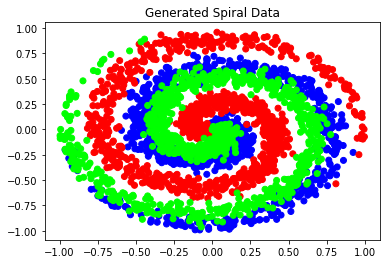

In [3]:
plt.scatter(X[:,0], X[:,1], c=y, cmap="brg")
plt.title("Generated Spiral Data")
plt.show()

In [5]:
model = Model()

model.add(Dense(2, 64, L2w=5e-4, L2b=5e-4))
model.add(ReLU())
model.add(Dense(64, 3))
model.add(Softmax())

model.set(
    loss=CategoricalCrossentropy(), 
    optimizer=Adam(lr=0.02, decay=5e-7, epsilon=1e-7, beta1=0.9, beta2=0.999), 
    accuracy_fn=Categorical(binary=False)
)

In [6]:
history = model.train(X, y, 1000, print_every=None)

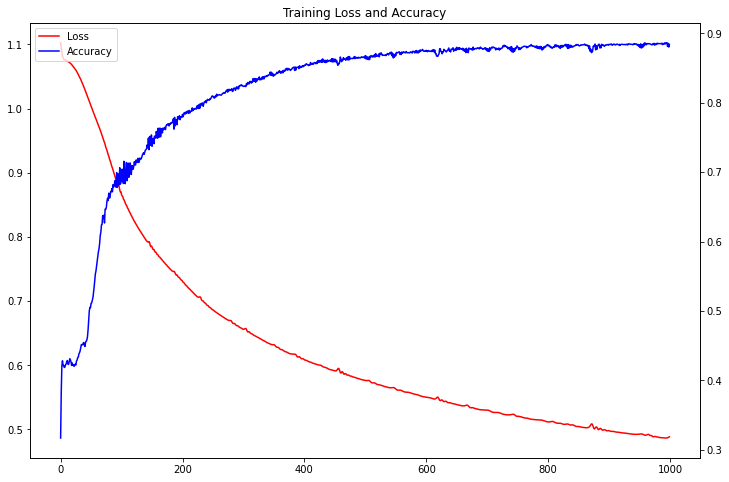

In [7]:
plot_history(history)



In [8]:
yhat = model.predict(X_test)


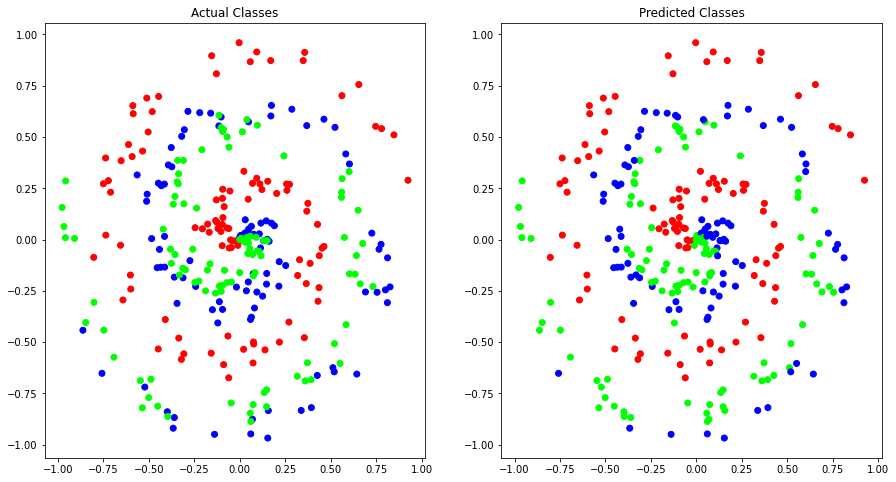

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes[0].scatter(X_test[:,0], X_test[:,1],c=y_test, cmap="brg")
axes[0].title.set_text("Actual Classes")

axes[1].scatter(X_test[:,0], X_test[:,1],c=yhat, cmap="brg")
axes[1].title.set_text("Predicted Classes")
